# Proyek Analisis Data: Bike Sharing
- Nama: Fannisa Tiara Salsabila
- Email: tiara1610salsabila@gmail.com
- Id Dicoding: fannisatiara

## Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan tren penyewaan sepeda sepanjang waktu?
2. Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewa sepeda?
3. Bagaimana perkembangan tren penyewaan sepeda berdasarkan hari dan bulan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### 1. Memuat tabel day_df

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Mengubah judul kolom agar lebih mudah dipahami serta mengubah data berbentuk angka menjadi keterangan

In [3]:
day_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'yr':'year'},inplace=True)

##### Memperbaiki tipe data

In [4]:
# Mengubah tipe data datetime 
day_df['datetime'] = pd.to_datetime(day_df.datetime)

day_df.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 2. Memuat tabel hour.df

In [5]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Mengubah judul kolom agar lebih mudah dipahami serta mengubah data berbentuk angka menjadi keterangan

In [6]:
hour_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'count',
                        'yr':'year',
                        'hr':'hour'},inplace=True)

##### Memperbaiki tipe data

In [7]:
# Mengubah tipe data datetime 
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

hour_df.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### 1. Memeriksa data day_df

#### Memeriksa tipe data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

#### Memeriksa missing value

In [9]:
day_df.isna().sum()

instant              0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

#### Memeriksa duplikasi data

In [10]:
day_df.duplicated().sum()

0

### 2. Memeriksa data hour_df

#### Memeriksa tipe data

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

#### Memeriksa missing value

In [12]:
hour_df.isna().sum()

instant              0
datetime             0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

#### Memeriksa duplikasi data

In [13]:
hour_df.duplicated().sum()

0

### Cleaning Data

Berdasarkan hasil yang diperoleh dari proses Assessing Data, data pada day_df dan hour_df tidak ditemukan adanya missing value maupun duplikasi data. Sehingga tahapan Cleaning Data dapat dilewati dan dapat dilanjutkan ke tahap Exploratory Data.

## Exploratory Data Analysis (EDA)

### 1. day_df exploration

#### Parameter statistik

In [14]:
day_df.describe()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Memeriksa penyewa sepeda (casual, registered, all) berdasarkan musim

In [15]:
day_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max','min','mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
1        334.928177  2269.204420  7836   431  2604.132597
2       1106.097826  3886.233696  8362   795  4992.331522
3       1202.611702  4441.691489  8714  1115  5644.303191
4        729.112360  3999.050562  8555    22  4728.162921

#### Penyewa sepeda berdasarkan kondisi cuaca

In [16]:
day_df.groupby(by=['weather_condition'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                               
                  nunique   max  min         mean          std
weather_condition                                             
1                     463  8714  431  4876.786177  1879.483989
2                     247  8362  605  4035.862348  1809.109918
3                      21  4639   22  1803.285714  1240.284449

#### Penyewa sepeda berdasarkan musim

In [17]:
day_df.groupby(by=['season'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

#### Penyewa sepeda berdasarkan bulan

In [18]:
day_df.groupby(by=['month'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
      nunique   max   min         mean          std
month                                              
1          62  4521   431  2176.338710  1161.674370
2          57  5062  1005  2655.298246  1145.313307
3          62  8362   605  3692.258065  1899.301812
4          60  7460   795  4484.900000  1776.160778
5          62  8294  2633  5349.774194  1298.711561
6          60  8120  3767  5772.366667  1240.400031
7          62  8173  3285  5563.677419  1273.751871
8          62  7865  1115  5664.419355  1494.516146
9          60  8714  1842  5766.516667  1810.130649
10         62  8156    22  5199.225806  1988.392517
11         60  6852  1495  4247.183333  1285.712709
12         62  6606   441  3403.806452  1549.639353

#### Penyewa sepeda berdasarkan hari

In [19]:
day_df.groupby(by=['weekday'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan tahun

In [20]:
day_df.groupby(by= ['year'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                        atemp                     humidity  \
           max      min      mean       max       min      mean      max   
year                                                                       
0     0.849167  0.05913  0.486665  0.840896  0.079070  0.466835   0.9725   
1     0.861667  0.10750  0.504081  0.804913  0.101658  0.481852   0.9250   

                         windspeed                      
           min      mean       max       min      mean  
year                                                    
0     0.000000  0.643665  0.507463  0.022392  0.191403  
1     0.254167  0.612166  0.441563  0.046650  0.189572

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan bulan

In [21]:
day_df.groupby(by= ['month'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                         atemp                      humidity  \
            max       min      mean       max       min      mean       max   
month                                                                         
1      0.425000  0.059130  0.236444  0.415383  0.079070  0.239796  0.911250   
2      0.521667  0.127500  0.299226  0.511983  0.101658  0.299731  0.929167   
3      0.601667  0.198333  0.390539  0.570067  0.200133  0.381954  0.948261   
4      0.664167  0.300000  0.469999  0.614925  0.283454  0.457081  0.888333   
5      0.775000  0.414167  0.594798  0.725383  0.404650  0.565662  0.922500   
6      0.834167  0.540833  0.684097  0.786613  0.525892  0.638246  0.833333   
7      0.861667  0.595833  0.755470  0.840896  0.549912  0.704094  0.865417   
8      0.793333  0.635833  0.708582  0.751267  0.242400  0.651475  0.850000   
9      0.753333  0.469167  0.616485  0.708983  0.461475  0.579299  0.972500   
10     0.657500  0.254167  0.485012  0.607975  0.227913  0.471973  0.906250   
11     0.530000  0.245833  0.369220  0.524612  0.248742  0.367359  0.962500   
12     0.475833  0.215833  0.324031  0.469054  0.220333  0.326160  0.970417   

                          windspeed                      
            min      mean       max       min      mean  
month                                                    
1      0.311250  0.585828  0.415429  0.073396  0.206303  
2      0.187917  0.567465  0.507463  0.045408  0.215684  
3      0.000000  0.588475  0.441563  0.089558  0.222699  
4      0.254167  0.588063  0.388067  0.065929  0.234482  
5      0.360417  0.688958  0.342667  0.074637  0.182989  
6      0.305000  0.575806  0.347642  0.077125  0.185420  
7      0.396250  0.597876  0.284813  0.080850  0.166059  
8      0.415000  0.637730  0.375617  0.070283  0.172918  
9      0.467083  0.714714  0.357587  0.050379  0.165945  
10     0.463333  0.693761  0.422275  0.022392  0.175205  
11     0.333478  0.624876  0.376871  0.046650  0.183801  
12     0.441250  0.666041  0.407346  0.047275  0.176609

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan musim

In [22]:
day_df.groupby(by= ['season'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
1       0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
2       0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
3       0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
4       0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                           windspeed                      
             min      mean       max       min      mean  
season                                                    
1       0.000000  0.582903  0.507463  0.045408  0.214537  
2       0.254167  0.626948  0.388067  0.065929  0.203507  
3       0.360000  0.633482  0.375617  0.064071  0.172095  
4       0.333478  0.668719  0.422275  0.022392  0.171995

#### Grafik histogram untuk temp, atemp, humidity, dan windspeed

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

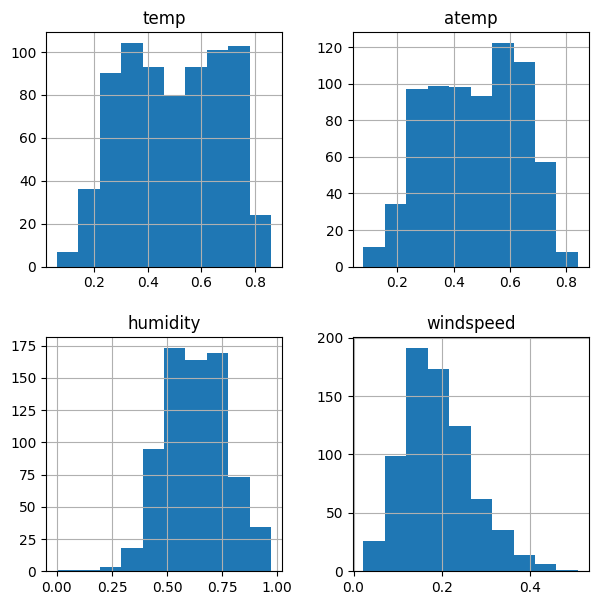

In [23]:
day_hist_df = day_df[["temp", "atemp", "humidity", "windspeed"]]
day_hist_df.hist(figsize=(7, 7), bins=10)

Berdasarkan grafik histogram pada data day_df di atas, terlihat bahwa temp dan atemp memiliki distribusi left-skewed, sementara humidity dan windspeed memiliki distribusi right-skewed.

### 2. hour_df exploration

#### Parameter statistik

In [24]:
hour_df.describe()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Memeriksa penyewa sepeda (casual, registered, all) berdasarkan musim

In [25]:
hour_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max','min','mean']
})

casual  registered count                
             mean        mean   max min        mean
season                                             
1       14.290901   96.823668   801   1  111.114569
2       46.160581  162.183488   957   1  208.344069
3       50.287144  185.729093   977   1  236.016237
4       30.666824  168.202032   967   1  198.868856

#### Penyewa sepeda berdasarkan kondisi cuaca

In [26]:
hour_df.groupby(by=['weather_condition'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                            
                  nunique   max min        mean         std
weather_condition                                          
1                   11413   977   1  204.869272  189.487773
2                    4544   957   1  175.165493  165.431589
3                    1419   891   1  111.579281  133.781045
4                       3   164  23   74.333333   77.925178

#### Penyewa sepeda berdasarkan musim

In [27]:
hour_df.groupby(by=['season'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                            
       nunique   max min        mean         std
season                                          
1         4242   801   1  111.114569  119.224010
2         4409   957   1  208.344069  188.362473
3         4496   977   1  236.016237  197.711630
4         4232   967   1  198.868856  182.967972

#### Penyewa sepeda berdasarkan bulan

In [28]:
hour_df.groupby(by=['month'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                            
      nunique   max min        mean         std
month                                          
1        1429   559   1   94.424773   99.907146
2        1341   610   1  112.865026  112.486565
3        1473   957   1  155.410726  163.543050
4        1437   822   1  187.260960  181.137902
5        1488   873   1  222.907258  187.721497
6        1440   900   1  240.515278  196.038950
7        1488   913   1  231.819892  187.483806
8        1475   941   1  238.097627  200.444648
9        1437   977   1  240.773138  214.609531
10       1451   963   1  222.158511  203.477057
11       1437   729   1  177.335421  158.973887
12       1483   759   1  142.303439  141.080674

#### Penyewa sepeda berdasarkan hari

In [29]:
hour_df.groupby(by=['weekday'], observed=True).agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                            
        nunique   max min        mean         std
weekday                                          
0          2502   776   1  177.468825  168.167710
1          2479   968   1  183.744655  179.514167
2          2453   970   1  191.238891  187.820480
3          2475   977   1  191.130505  190.894464
4          2471   976   1  196.436665  188.011923
5          2487   957   1  196.135907  174.076894
6          2512   783   1  190.209793  179.820569

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan tahun

In [30]:
hour_df.groupby(by= ['year'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity                  \
       max   min      mean     max     min      mean      max   min      mean   
year                                                                            
0     0.96  0.02  0.489069  1.0000  0.0000  0.469000      1.0  0.00  0.643430   
1     1.00  0.02  0.504825  0.9242  0.0152  0.482481      1.0  0.16  0.611193   

     windspeed                 
           max  min      mean  
year                           
0       0.8507  0.0  0.191172  
1       0.8060  0.0  0.189034

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan bulan

In [31]:
hour_df.groupby(by= ['month'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity        \
        max   min      mean     max     min      mean      max   min   
month                                                                  
1      0.58  0.02  0.237649  0.5455  0.0000  0.240676     1.00  0.21   
2      0.66  0.06  0.300209  0.6212  0.0455  0.300621     1.00  0.08   
3      0.72  0.12  0.390903  0.6515  0.0909  0.382299     1.00  0.00   
4      0.80  0.24  0.470021  0.6970  0.2273  0.457110     1.00  0.16   
5      0.90  0.34  0.594798  0.8333  0.3030  0.565662     1.00  0.21   
6      0.98  0.46  0.684097  0.9242  0.4545  0.638246     1.00  0.20   
7      1.00  0.58  0.755470  1.0000  0.5455  0.704094     0.94  0.16   
8      0.92  0.52  0.708705  0.8485  0.2424  0.651556     0.94  0.25   
9      0.86  0.38  0.616507  0.7879  0.3939  0.579344     1.00  0.28   
10     0.74  0.22  0.487181  0.6818  0.1970  0.473913     1.00  0.27   
11     0.64  0.20  0.369200  0.6212  0.1970  0.367339     1.00  0.16   
12     0.60  0.14  0.324167  0.6212  0.1515  0.326296     1.00  0.26   

                windspeed                 
           mean       max  min      mean  
month                                     
1      0.580931    0.6567  0.0  0.207551  
2      0.567211    0.8060  0.0  0.215961  
3      0.589050    0.6866  0.0  0.222517  
4      0.588114    0.7164  0.0  0.234323  
5      0.688958    0.6119  0.0  0.182989  
6      0.575806    0.5821  0.0  0.185420  
7      0.597876    0.8507  0.0  0.166059  
8      0.637227    0.8358  0.0  0.171468  
9      0.714454    0.6418  0.0  0.165856  
10     0.689490    0.5821  0.0  0.171919  
11     0.625045    0.6418  0.0  0.183764  
12     0.666116    0.6567  0.0  0.176574

#### Memeriksa temp, atemp, humidity, dan windspeed berdasarkan musim

In [32]:
hour_df.groupby(by= ['season'], observed=True).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                   atemp                   humidity        \
         max   min      mean     max     min      mean      max   min   
season                                                                  
1       0.72  0.02  0.299147  0.6515  0.0000  0.298116      1.0  0.00   
2       0.94  0.16  0.544663  0.8788  0.1667  0.520547      1.0  0.16   
3       1.00  0.38  0.706410  1.0000  0.2424  0.656004      1.0  0.16   
4       0.76  0.14  0.423138  0.6818  0.1515  0.415738      1.0  0.16   

                 windspeed                 
            mean       max  min      mean  
season                                     
1       0.581348    0.8060  0.0  0.215107  
2       0.627022    0.7164  0.0  0.203410  
3       0.633167    0.8507  0.0  0.171593  
4       0.667124    0.6418  0.0  0.170819

In [33]:
day_df.groupby(by= ['datetime']).agg({
    'count':'sum'
})

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


#### Grafik histogram untuk temp, atemp, humidity, dan windspeed

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

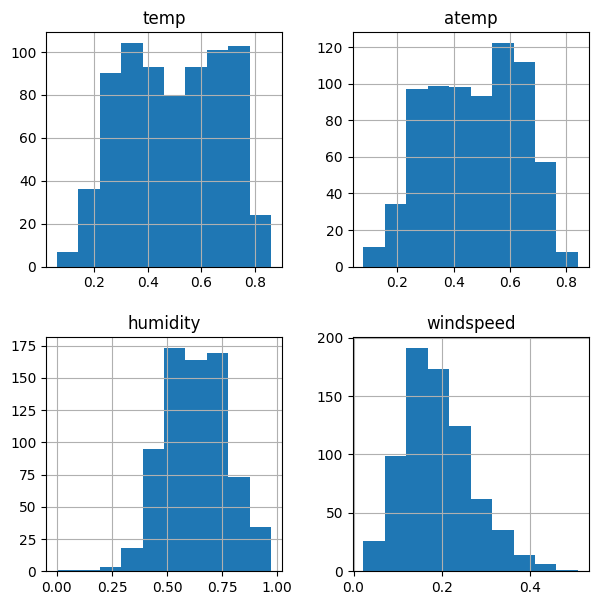

In [34]:
hour_hist_df = day_df[["temp", "atemp", "humidity", "windspeed"]]
hour_hist_df.hist(figsize=(7, 7), bins=10)

Berdasarkan grafik histogram pada data hour_df di atas, terlihat bahwa temp, atemp, dan windspeed memiliki distribusi left-skewed, sementara humidity memiliki distribusi right-skewed.

### 3. main_df exploration

In [35]:
# Merge day_df and hour_df
main_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="datetime",
    right_on="datetime"
)

# Check the first 5 rows
main_df.head()

,instant_x,datetime,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_condition_x,temp_x,...,weekday_y,workingday_y,weather_condition_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant_x            17379 non-null  int64         
 1   datetime             17379 non-null  datetime64[ns]
 2   season_x             17379 non-null  int64         
 3   year_x               17379 non-null  int64         
 4   month_x              17379 non-null  int64         
 5   holiday_x            17379 non-null  int64         
 6   weekday_x            17379 non-null  int64         
 7   workingday_x         17379 non-null  int64         
 8   weather_condition_x  17379 non-null  int64         
 9   temp_x               17379 non-null  float64       
 10  atemp_x              17379 non-null  float64       
 11  humidity_x           17379 non-null  float64       
 12  windspeed_x          17379 non-null  float64       
 13  casual_x             17379 non-

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan tren penyewaan sepeda sepanjang waktu?

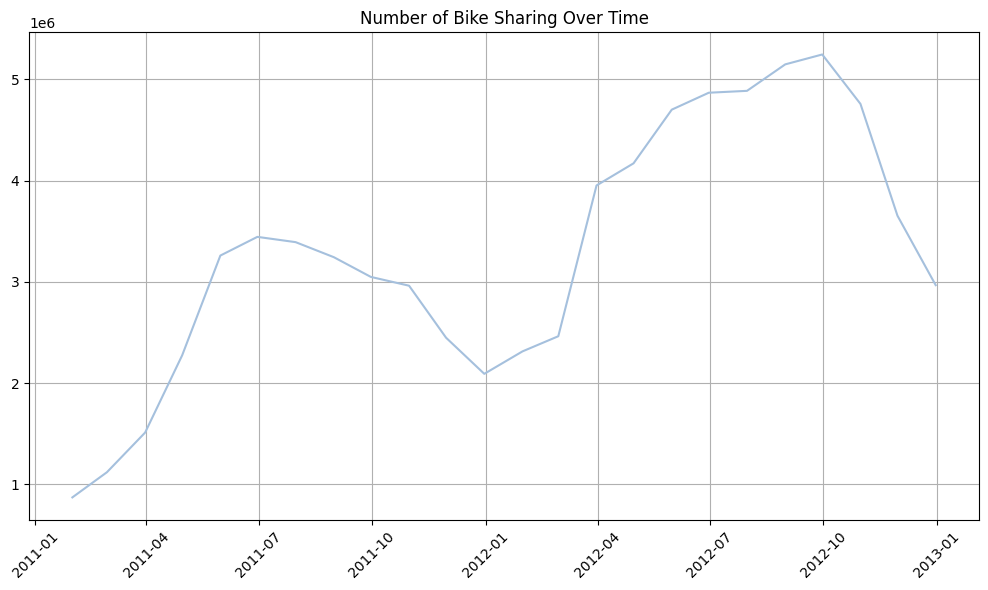

In [59]:
# Menggabungkan data berdasarkan bulan
monthly_df = main_df.resample('M', on='datetime').sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_df.index, monthly_df['count_x'], color='#A5C0DD')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Bike Sharing Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewa sepeda?

In [38]:
weather_agg = main_df.groupby("weather_condition_x").agg({
    "instant_x": "nunique",
    "count_x": ["max", "min"]
})
weather_agg

instant_x count_x     
                      nunique     max  min
weather_condition_x                       
1                         463    8714  431
2                         247    8362  605
3                          21    4639   22

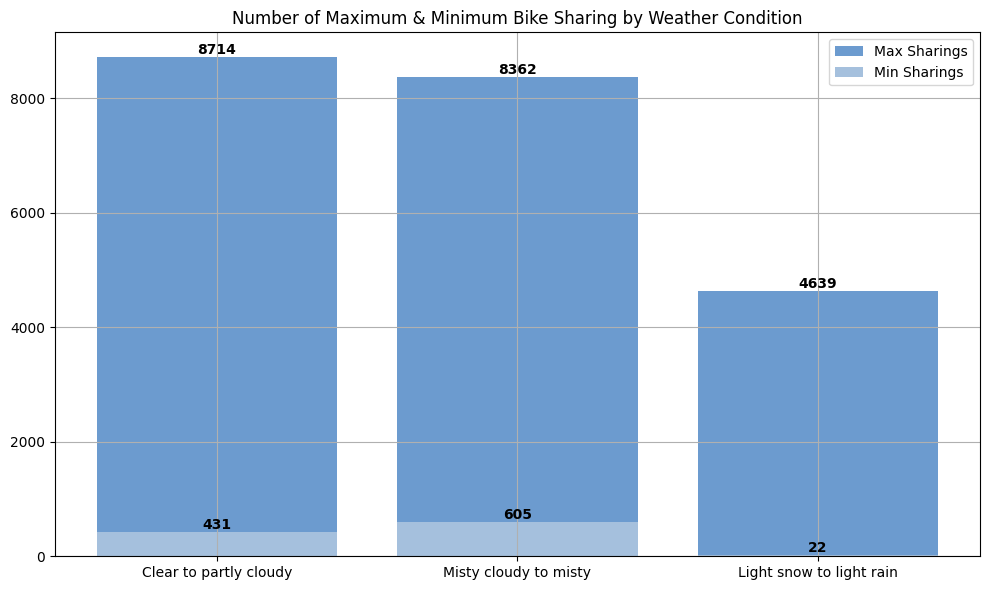

In [55]:
plt.figure(figsize=(10, 6))
x = weather_agg.index
y_max = weather_agg[('count_x', 'max')]
y_min = weather_agg[('count_x', 'min')]

plt.bar(x, y_max, label='Max Sharings', color='#6C9BCF')
plt.bar(x, y_min, label='Min Sharings', color='#A5C0DD')

# Modify x-axis labels
weather_labels = ['Clear to partly cloudy', 'Misty cloudy to misty', 'Light snow to light rain']
plt.xticks(x, weather_labels)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Maximum & Minimum Bike Sharing by Weather Condition')
plt.legend()

# Annotate the maximum and minimum values
for i, (max_val, min_val) in enumerate(zip(y_max, y_min)):
    plt.text(i+1, max_val, str(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i+1, min_val, str(min_val), ha='center', va='bottom', fontweight='bold')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan Grafik di atas, cuaca sangat mempengaruhi pada penggunaan bike sharing, pengguna bike sharing paling banyak pada weather condition clear to partly cloudy dan paling sedikit pada weather condition ligth rain or snow.

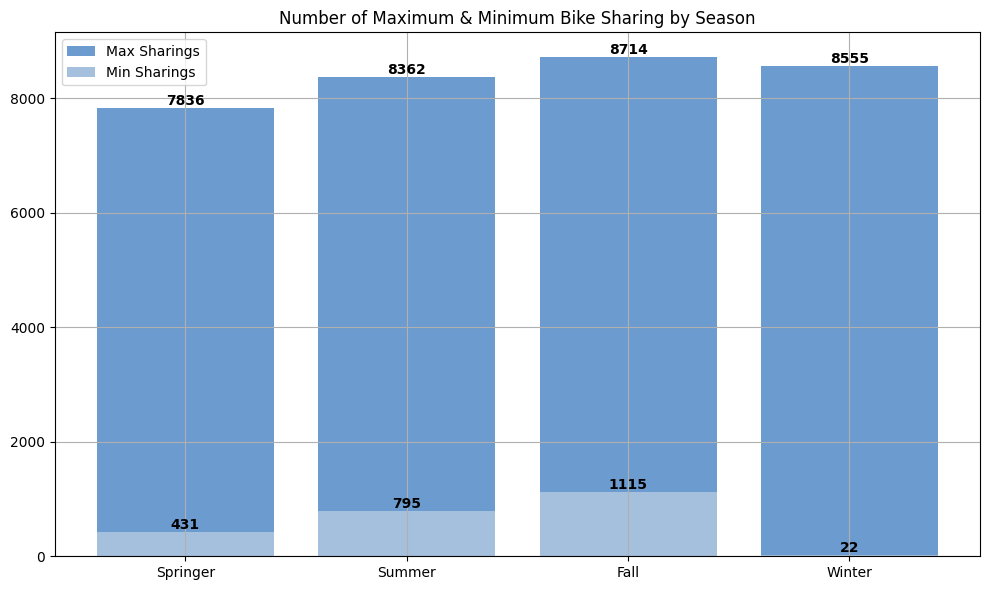

In [54]:
season_agg = main_df.groupby("season_x").agg({
    "instant_x": "nunique",
    "count_x": ["max", "min"]
})
season_agg

plt.figure(figsize=(10, 6))
x = season_agg.index
y_max = season_agg[('count_x', 'max')]
y_min = season_agg[('count_x', 'min')]

plt.bar(x, y_max, label='Max Sharings', color='#6C9BCF')
plt.bar(x, y_min, label='Min Sharings', color='#A5C0DD')

# Modify x-axis labels
season_labels = ['Springer', 'Summer', 'Fall', 'Winter']
plt.xticks(x, season_labels)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Maximum & Minimum Bike Sharing by Season')
plt.legend()

# Annotate the maximum and minimum values
for i, (max_val, min_val) in enumerate(zip(y_max, y_min)):
    plt.text(i+1, max_val, str(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i+1, min_val, str(min_val), ha='center', va='bottom', fontweight='bold')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan Grafik di atas, musim sangat mempengaruhi pada penggunaan bike sharing, pengguna bike sharing paling banyak pada season fall (musim gugur) dan paling sedikit pada season winter (musim dingin).

### Pertanyaan 3: Bagaimana perkembangan tren penyewaan sepeda berdasarkan hari dan bulan?

#### Berdasarkan Hari

In [42]:
weekday_agg = main_df.groupby("weekday_x").agg({
    "instant_x": "nunique",
    "count_x": ["max", "min"]
})
weekday_agg

instant_x count_x      
            nunique     max   min
weekday_x                        
0               105    8227   605
1               105    7525    22
2               104    7767   683
3               104    8173   441
4               104    7804   431
5               104    8362  1167
6               105    8714   627

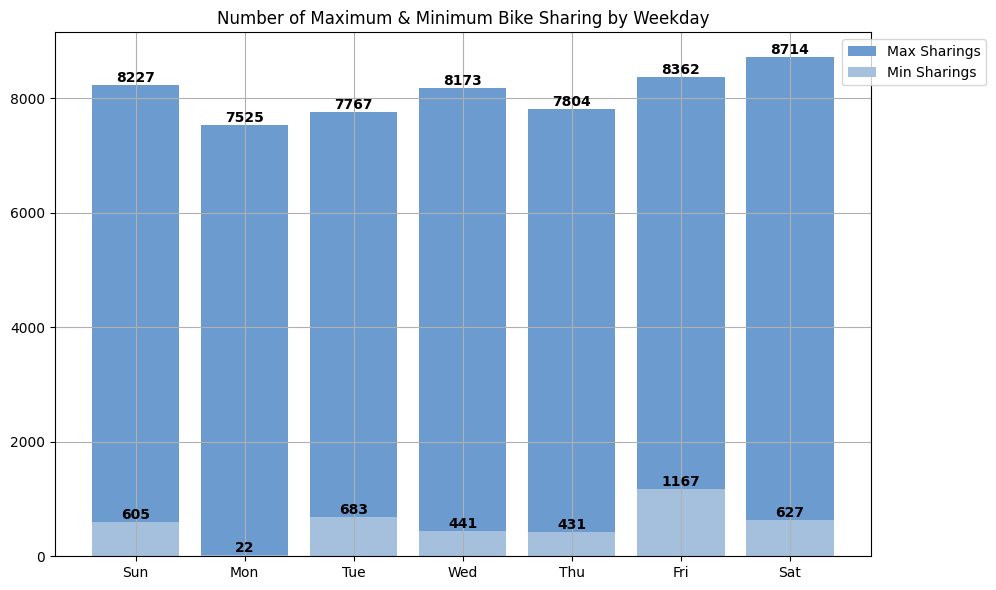

In [43]:
plt.figure(figsize=(10, 6))
x = weekday_agg.index
y_max = weekday_agg[('count_x', 'max')]
y_min = weekday_agg[('count_x', 'min')]

plt.bar(x, y_max, label='Max Sharings', color='#6C9BCF')
plt.bar(x, y_min, label='Min Sharings', color='#A5C0DD')

# Modify y-axis labels
month_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(x,month_labels)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Maximum & Minimum Bike Sharing by Weekday')
plt.xticks(rotation=0)
plt.legend()

# Annotate the maximum and minimum values
for i, (max_val, min_val) in enumerate(zip(y_max, y_min)):
    plt.text(i, max_val, str(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i, min_val, str(min_val), ha='center', va='bottom', fontweight='bold')
    
# Adjust the position of the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, Penyewaan bike sharing paling banyak terjadi pada hari Sabtu, dan paling sedikit pada hari Senin.

#### Berdasarkan Bulan

In [44]:
monthly_agg = main_df.groupby("month_x").agg({
    "instant_x": "nunique",
    "count_x": ["max", "min"]
})
monthly_agg

instant_x count_x      
          nunique     max   min
month_x                        
1              62    4521   431
2              57    5062  1005
3              62    8362   605
4              60    7460   795
5              62    8294  2633
6              60    8120  3767
7              62    8173  3285
8              62    7865  1115
9              60    8714  1842
10             62    8156    22
11             60    6852  1495
12             62    6606   441

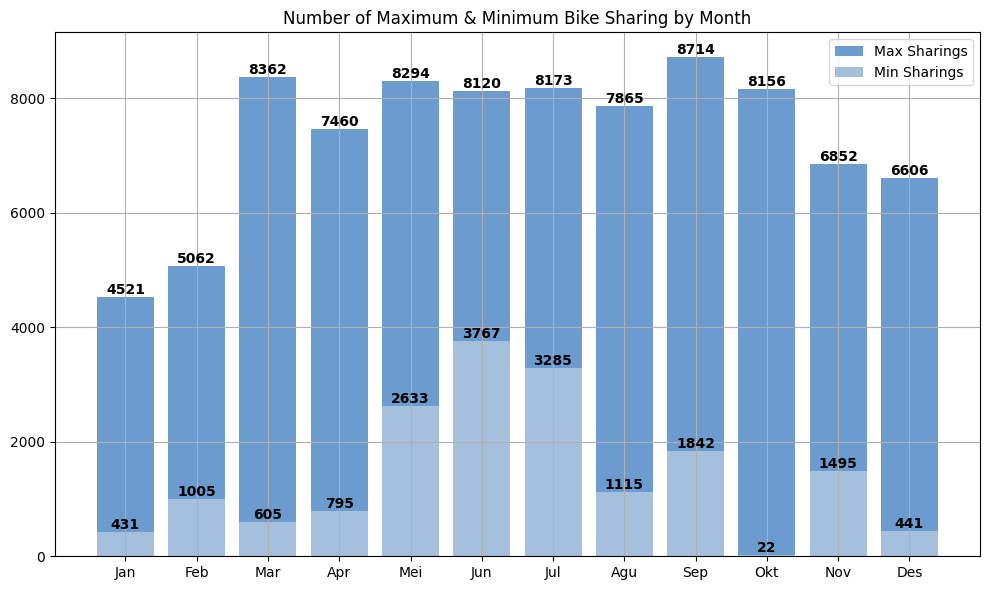

In [45]:
plt.figure(figsize=(10, 6))
x = monthly_agg.index
y_max = monthly_agg[('count_x', 'max')]
y_min = monthly_agg[('count_x', 'min')]

plt.bar(x, y_max, label='Max Sharings', color='#6C9BCF')
plt.bar(x, y_min, label='Min Sharings', color='#A5C0DD')

# Modify y-axis labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(x,month_labels)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Maximum & Minimum Bike Sharing by Month')
plt.legend()

# Annotate the maximum and minimum values
for i, (max_val, min_val) in enumerate(zip(y_max, y_min)):
    plt.text(i+1, max_val, str(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i+1, min_val, str(min_val), ha='center', va='bottom', fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, Penyewaan bike sharing paling banyak terjadi pada bulan September, dan paling sedikit pada bulan Oktober.

## Conclusion

Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

Berdasarkan grafik yang ditampilkan di atas, dapat disimpulkan bahwa penyewa sepeda paling banyak adalah ketika cuaca cerah, sedangkan penyewa sepeda paling sedikit adalah ketika cuaca hujan. Urutan dari penyewa paling banyak hingga paling sedikit berdasarkan cuaca adalah sebagai berikut :
1. Clear to partly cloudy
2. Misty cloudy to misty
3. Light snow to light rain

Pertanyaan 2 : Apakah musim yang memiliki jumlah penyewa tertinggi?

Berdasarkan grafik yang ditampilkan di atas, dapat disimpulkan bahwa penyewa sepeda paling banyak adalah ketika musim gugur (fall season). Urutan dari penyewa paling banyak hingga paling sedikit berdasarkan musim adalah sebagai berikut :
1. Fall
2. Summer
3. Springer
4. Winter

Pertanyaan 3 : Bagaimana perkembangan tren penyewaan sepeda berdasarkan hari dan bulan?

1. Berdasarkan grafik yang ditampilkan di atas, tren penyewaan sepeda berdasarkan hari paling banyak adalah pada hari sabtu, sedangkan paling sedikit adalah pada hari senin
   
2. Berdasarkan grafik yang ditampilkan di atas, tren penyewaan sepeda berdasarkan bulan paling banyak adalah pada bulan september, sedangkan paling sedikit adalah pada bulan oktober

In [60]:
day_df.to_csv("dashboard\data_clean.csv", index=False)